**The Sparks Foundation-
Data Science and Business Analytics Internship**

**Task 1-Prediction using supervised ML**

Github link-https://github.com/vthapa21/Sparks_foundation_data_science

Dataset link-http://bit.ly/w-data


**Intern- Vishal Thapa**

**GRIP November 2021 Batch**


✅**IMPORTING DATA**









In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Read data
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [121]:
# Print top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Print last 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [82]:
# To find the number of rows and columns
df.shape

(25, 2)

In [83]:
# More info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [122]:
# Statistical details
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [123]:
# Check for null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

*No null or missing values present in the dataset*

✅**DATA VISUALIZATION**

*Plot dataset to see relation between two variables*

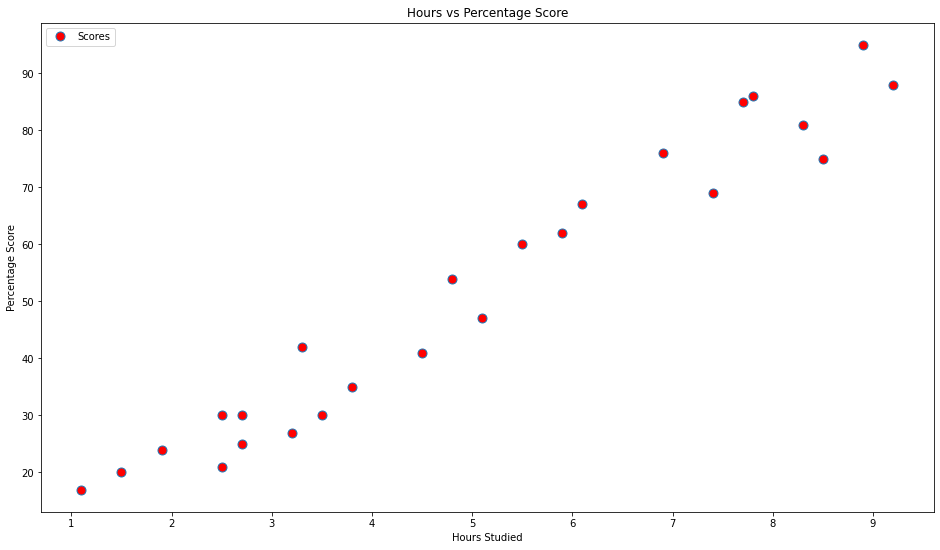

In [124]:
#Plotting the distribution
df.plot(x='Hours', y='Scores', style='o', markerfacecolor='red', markersize='9')  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*We observe there is a linear relation between "hours studied" and "percentage score"* 

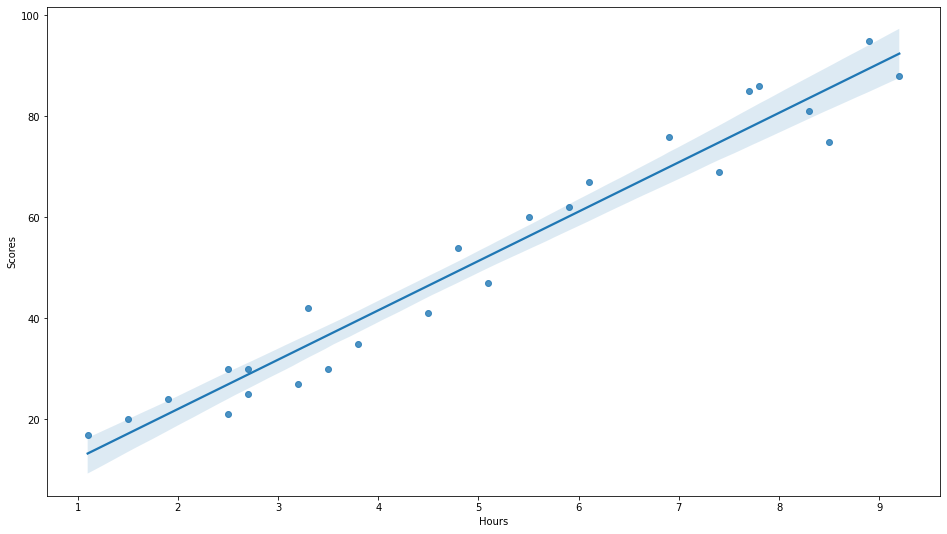

In [125]:
#For clear visualization, a linear line is drawn
sns.regplot(x=df['Hours'], y=df['Scores']);

✅**DATA PREPARATION**

*Dividing into attributes and labels*

In [126]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [127]:
# Split into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

✅**ALGORITHM TRAINING**

In [128]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, train_y)   

LinearRegression()

✅**MODEL VISUALIZATION**

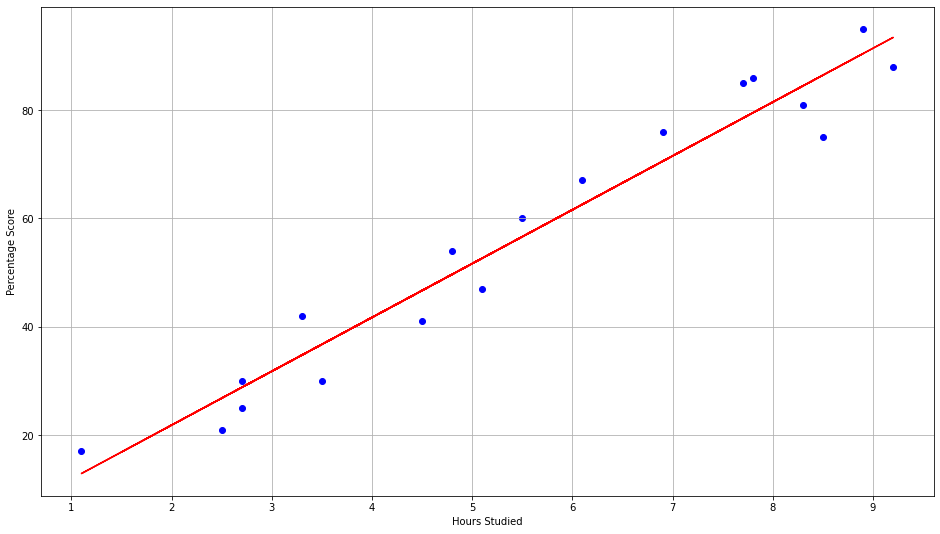

In [129]:
line = model.coef_*X + model.intercept_

# Plot the training data
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

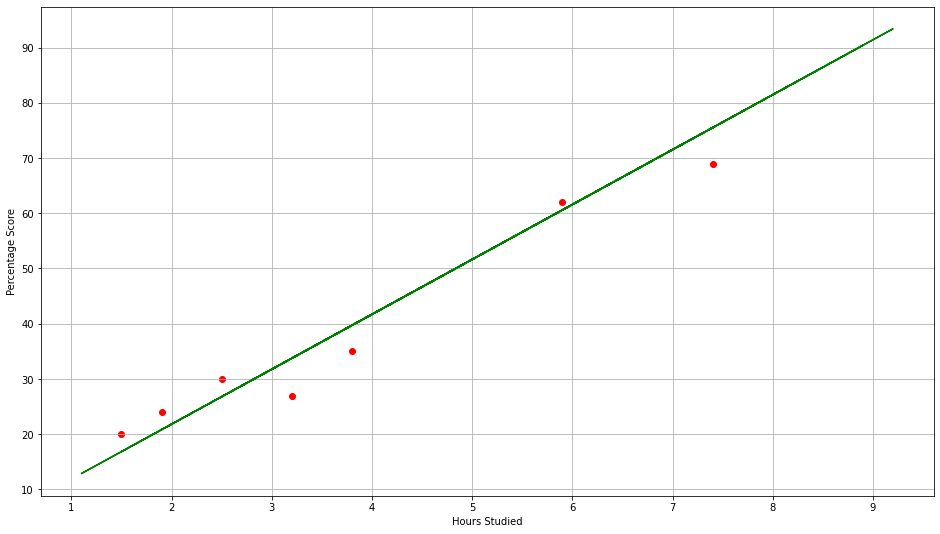

In [130]:
# Plot the testing data
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

✅**PREDICTION**

In [133]:
y_pred = model.predict(X_test)


In [132]:
#Comparison
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp


,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24]]","[[16.844721762383802], [33.74557493951356], [7..."


✅**What is the predicted score if a student studies for 9.25hrs/day?**

In [134]:
h = 9.25
o = model.predict([[h]])
print("The predicted score if a person studies for",h,"hours is",o[0])

The predicted score if a person studies for 9.25 hours is [93.89272889]


✅**EVALUATION**

In [135]:
from sklearn import metrics 
# Mean Absolute Error
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error
print('Mean Squared Error  :', metrics.mean_squared_error(y_test, y_pred))

# Max Error
print('Max Error           :', metrics.max_error(y_test, y_pred))

Mean Absolute Error : 4.130879918502482
Mean Squared Error  : 20.33292367497996
Max Error           : 6.74557493951356
